<a href="https://colab.research.google.com/github/ali-farshad/Homework1-ME5920/blob/main/2_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import torch
from torchvision import datasets, transforms
import matplotlib.pyplot as plt

!pip -q install einops
from einops import rearrange

import numpy as np
from collections import Counter

In [2]:
transform = transforms.ToTensor()

mnist_train = datasets.MNIST(root="./data", train=True, download=True, transform=transform)
subset_size = 1000
images_list = []
labels_list = []

for i in range(subset_size):
    img, label = mnist_train[i]
    images_list.append(img.squeeze(0))
    labels_list.append(label)

images = torch.stack(images_list)
labels = torch.tensor(labels_list)
print("images shape:", images.shape)
print("labels shape:", labels.shape)
print("first 10 labels:", labels[:10].tolist())

images shape: torch.Size([1000, 28, 28])
labels shape: torch.Size([1000])
first 10 labels: [5, 0, 4, 1, 9, 2, 1, 3, 1, 4]


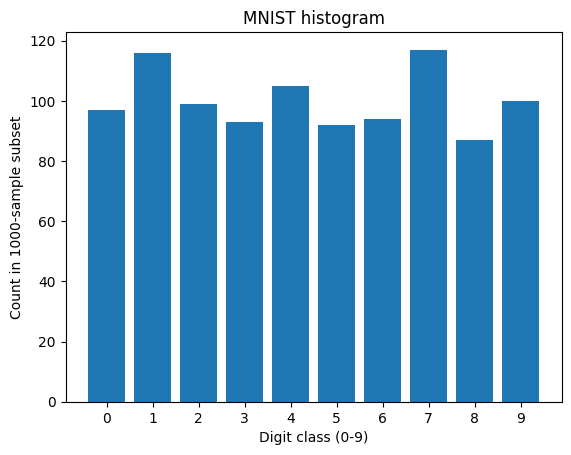

Counts: Counter({7: 117, 1: 116, 4: 105, 9: 100, 2: 99, 0: 97, 6: 94, 3: 93, 5: 92, 8: 87})


In [3]:
counts = Counter(labels.tolist())
classes = list(range(10))
values = [counts.get(c, 0) for c in classes]

plt.figure()
plt.bar(classes, values)
plt.xlabel("Digit class (0-9)")
plt.ylabel("Count in 1000-sample subset")
plt.title("MNIST histogram")
plt.xticks(classes)
plt.show()

print("Counts:", counts)

In [4]:
batch_size = 25
num_batches = subset_size // batch_size
images_ch = images.unsqueeze(1)
batches = rearrange(images_ch, '(nb bs) c h w -> nb bs c h w', nb=num_batches, bs=batch_size)

print("batched shape:", batches.shape)

batched shape: torch.Size([40, 25, 1, 28, 28])


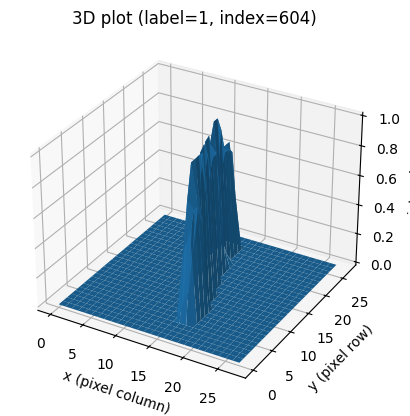

In [5]:
from mpl_toolkits.mplot3d import Axes3D

idx = np.random.randint(0, subset_size)
img = images[idx].numpy()
lab = labels[idx].item()

x = np.arange(28)
y = np.arange(28)
X, Y = np.meshgrid(x, y)
Z = img
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(X, Y, Z)

ax.set_title(f"3D plot (label={lab}, index={idx})")
ax.set_xlabel("x (pixel column)")
ax.set_ylabel("y (pixel row)")
ax.set_zlabel("intensity")
plt.show()